In [9]:
import netCDF4 as nc
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import collections
import matplotlib.font_manager
import xarray as xr

In [2]:
# Defining path to GLDAS_NOAH10_M data
p = "/home/maiampow/remoteData/GLDAS_NEW/GLDAS_NOAH10_M/"

In [10]:
# Creating dataframe for only Mississippi Basin (Lat, Lon = [47.5,95.5])

mississ_df = pd.DataFrame()

#Iterating through files in path
for filename in os.listdir(p):
    try:
        #Reading in data as xarray then converting to DataFrame
        xd = xr.open_dataset(p+str(filename))
        xd_df = xd.to_dataframe()
        xd_df.reset_index(inplace=True)
        
        #Extracting only needed columns 
        int_df = xd_df[["time", "lon", "lat", "SWE_inst", 'SoilMoi0_10cm_inst',
           'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilMoi100_200cm_inst']]    
        
        #Index where Mississippi Basin longitude/latitude coordinates are in the DataFrame
        df_slice = int_df.iloc[95357] 
        
        mississ_df = pd.concat([mississ_df, df_slice], axis=1)
    except:
        pass

In [11]:
#Sorting and shaping DataFrame
mississ_df = mississ_df.transpose()
mississ_df = mississ_df.sort_values(by=['time'])
mississ_df

,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
95357,1948-01-01,95.5,47.5,0.442591,11.573445,51.718342,96.965424,192.793671
95357,1948-02-01,95.5,47.5,0.398707,11.110646,51.71833,96.965424,192.793671
95357,1948-03-01,95.5,47.5,0.524073,10.682569,51.718102,96.965111,192.793671
95357,1948-04-01,95.5,47.5,0.032042,12.813025,51.664322,96.944405,192.793671
95357,1948-05-01,95.5,47.5,0.032056,14.85473,51.383934,96.761818,192.828583
...,...,...,...,...,...,...,...,...
95357,2014-08-01,95.5,47.5,0.0,15.328012,47.783836,85.130653,180.410294
95357,2014-09-01,95.5,47.5,0.011917,16.006437,48.024326,83.788216,180.108322
95357,2014-10-01,95.5,47.5,0.043145,15.167588,46.834347,83.383392,179.809143
95357,2014-11-01,95.5,47.5,0.223667,12.932709,46.41626,83.342369,179.665054


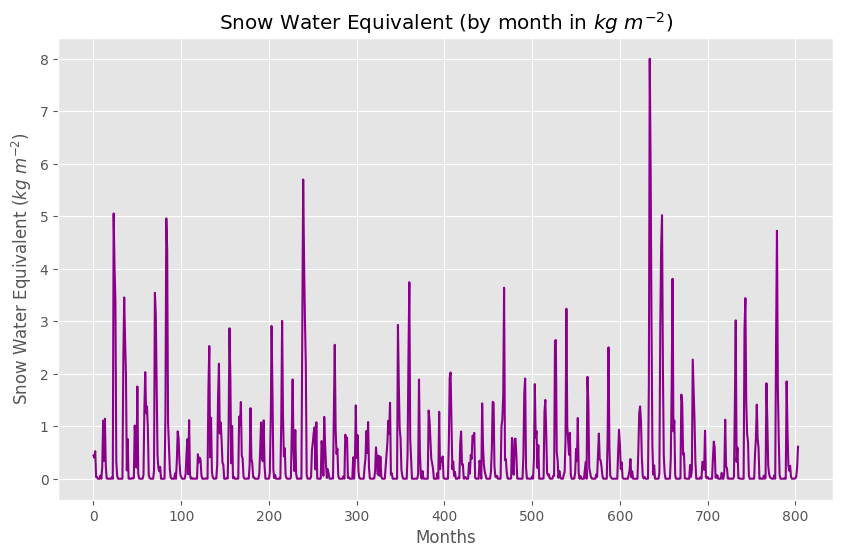

In [16]:
#Plotting Snow Water Equivalent over 804 Months 
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(list(mississ_df["SWE_inst"]), color="darkmagenta")
plt.xlabel("Months")
plt.ylabel("Snow Water Equivalent ($kg\ m^{-2}$)")
plt.title("Snow Water Equivalent (by month in $kg\ m^{-2}$)")
plt.show()

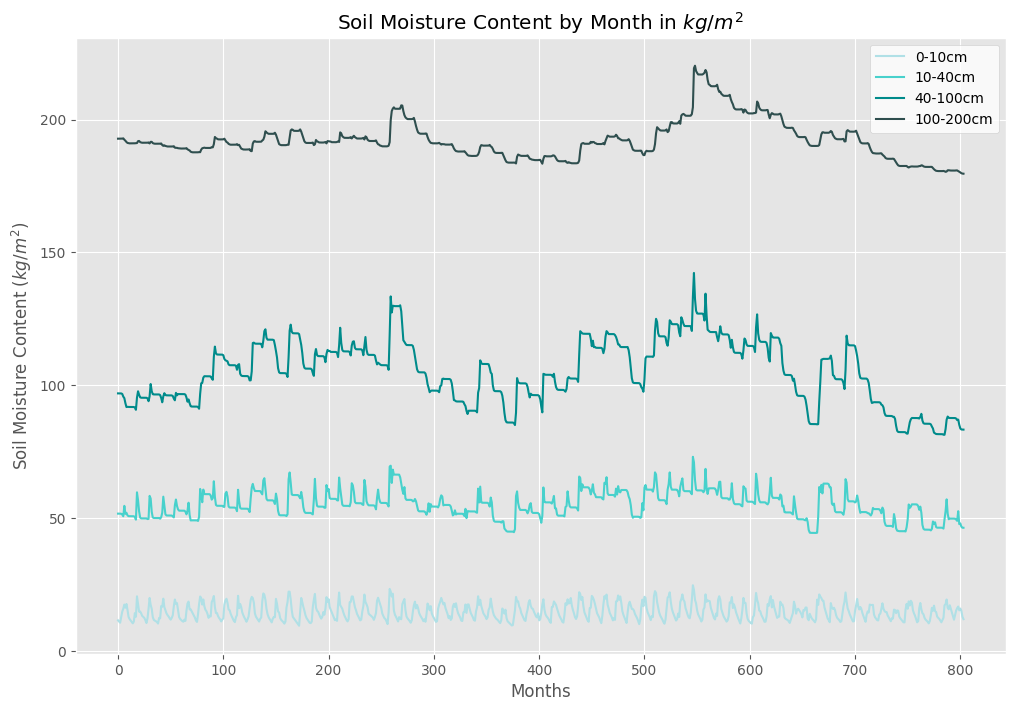

In [19]:
#Plotting Soil Moisture Content at different depths over 804 months
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.plot(list(mississ_df["SoilMoi0_10cm_inst"]), color="powderblue")
plt.plot(list(mississ_df["SoilMoi10_40cm_inst"]), color="mediumturquoise")
plt.plot(list(mississ_df["SoilMoi40_100cm_inst"]), color="darkcyan")
plt.plot(list(mississ_df["SoilMoi100_200cm_inst"]), color="darkslategrey")
plt.xlabel("Months")
plt.ylabel("Soil Moisture Content ($kg/m^2$)")
plt.legend(["0-10cm", "10-40cm", "40-100cm", "100-200cm"],facecolor='w')
plt.title("Soil Moisture Content by Month in $kg/m^2$")
plt.show()

In [34]:
#Reading in data for one (random) month
xd = xr.open_dataset("/home/maiampow/remoteData/GLDAS_NEW/GLDAS_NOAH10_M/GLDAS_NOAH10_M.A198112.020.nc4")

In [36]:
xr_df = xd.to_dataframe()
xr_df.reset_index(inplace=True)

In [85]:
latlon_df = xr_df[["time", "lon", "lat", "SWE_inst", 'SoilMoi0_10cm_inst',
           'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilMoi100_200cm_inst']]

In [87]:
latlon_df

,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
0,1981-12-01,-179.5,-59.5,NaN,NaN,NaN,NaN,NaN
1,1981-12-01,-179.5,-58.5,NaN,NaN,NaN,NaN,NaN
2,1981-12-01,-179.5,-57.5,NaN,NaN,NaN,NaN,NaN
3,1981-12-01,-179.5,-56.5,NaN,NaN,NaN,NaN,NaN
4,1981-12-01,-179.5,-55.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
107995,1981-12-01,179.5,85.5,NaN,NaN,NaN,NaN,NaN
107996,1981-12-01,179.5,86.5,NaN,NaN,NaN,NaN,NaN
107997,1981-12-01,179.5,87.5,NaN,NaN,NaN,NaN,NaN
107998,1981-12-01,179.5,88.5,NaN,NaN,NaN,NaN,NaN


In [88]:
ll_half = latlon_df[54000:] #Eliminating duplicates

In [91]:
ll_half = ll_half[ll_half.SWE_inst.notnull()] #Removing rows with NaN values

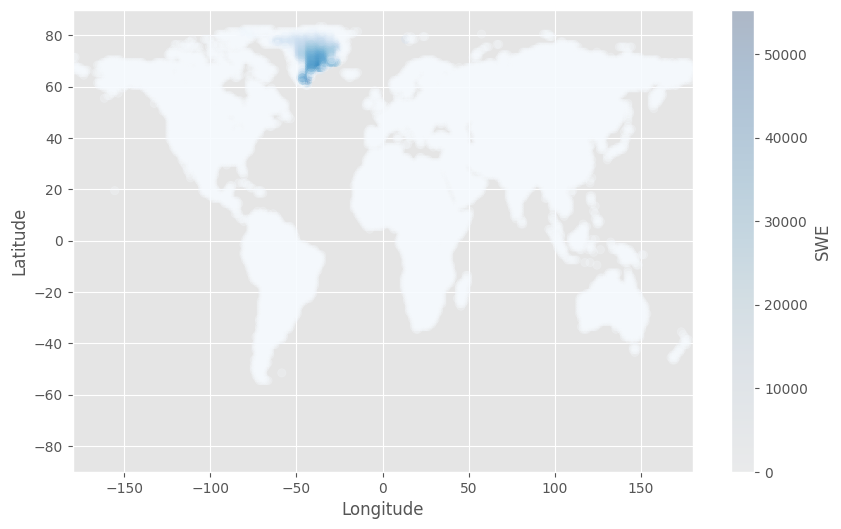

In [97]:
#Creating Snow Water Equivalent heatmap for one point in time (one month)

x = ll_half['lon']
y = ll_half['lat']
z = ll_half['SWE_inst']
plt.figure(figsize=(10,6))
plt.scatter(x, y, c=z, alpha=0.25,
            cmap='Blues')
plt.colorbar(label='SWE')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [160]:
#Finding Mississippi Basin coordinates in DataFrame

for i in range(0,len(latlon_df)):
    if list(latlon_df.iloc[i]) == [95.5,47.5]:
        print(i)

41357
95357


In [41]:
#Creating array of lon/lat coordinates provided by GLDAS

lat_lon_coords = np.empty((150,360),dtype=object)

xd_lat = np.array(xd["lat"]).flatten()
xd_lon = np.array(xd["lon"]).flatten()

for i in range(0,len(xd_lat)):
    for j in range(0,len(xd_lon)):
        lat_lon_coords[i,j] = (xd_lat[i], xd_lon[i])

In [42]:
lat_lon_coords

array([[(-59.5, -179.5), (-59.5, -179.5), (-59.5, -179.5), ...,
        (-59.5, -179.5), (-59.5, -179.5), (-59.5, -179.5)],
       [(-58.5, -178.5), (-58.5, -178.5), (-58.5, -178.5), ...,
        (-58.5, -178.5), (-58.5, -178.5), (-58.5, -178.5)],
       [(-57.5, -177.5), (-57.5, -177.5), (-57.5, -177.5), ...,
        (-57.5, -177.5), (-57.5, -177.5), (-57.5, -177.5)],
       ...,
       [(87.5, -32.5), (87.5, -32.5), (87.5, -32.5), ..., (87.5, -32.5),
        (87.5, -32.5), (87.5, -32.5)],
       [(88.5, -31.5), (88.5, -31.5), (88.5, -31.5), ..., (88.5, -31.5),
        (88.5, -31.5), (88.5, -31.5)],
       [(89.5, -30.5), (89.5, -30.5), (89.5, -30.5), ..., (89.5, -30.5),
        (89.5, -30.5), (89.5, -30.5)]], dtype=object)

In [27]:
#Initial data exploration

p1 = "/home/maiampow/remoteData/GLDAS/NOAH_monthly"

noah_d1 = pd.DataFrame()

for filename in os.listdir(p1):
    try:
        data = nc.Dataset(p1+str(filename))
        df = pd.DataFrame([data.variables])
        noah_d1 = pd.concat([noah_d1, df], axis=0)
    except:
        pass

In [29]:
noah_d1.columns

Index(['time', 'time_bnds', 'lon', 'lat', 'Swnet_tavg', 'Lwnet_tavg',
       'Qle_tavg', 'Qh_tavg', 'Qg_tavg', 'Snowf_tavg', 'Rainf_tavg',
       'Evap_tavg', 'Qs_acc', 'Qsb_acc', 'Qsm_acc', 'AvgSurfT_inst',
       'Albedo_inst', 'SWE_inst', 'SnowDepth_inst', 'SoilMoi0_10cm_inst',
       'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilMoi100_200cm_inst',
       'SoilTMP0_10cm_inst', 'SoilTMP10_40cm_inst', 'SoilTMP40_100cm_inst',
       'SoilTMP100_200cm_inst', 'PotEvap_tavg', 'ECanop_tavg', 'Tveg_tavg',
       'ESoil_tavg', 'RootMoist_inst', 'CanopInt_inst', 'Wind_f_inst',
       'Rainf_f_tavg', 'Tair_f_inst', 'Qair_f_inst', 'Psurf_f_inst',
       'SWdown_f_tavg', 'LWdown_f_tavg'],
      dtype='object')